In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Project Explanation 
This project requires to understanding of the overall emotional tone surrounding financial markets or specific companies. It can predict whether a message is positive, neutral, or negative.
Benefits of Financial Sentiment Analysis:
* Identify market trends: By analyzing the collective sentiment, analysts can gain insights into potential market movements and identify potential opportunities.
* Gauge risk and reward: Sentiment analysis can help assess the level of risk associated with an investment by understanding the prevailing market sentiment towards specific companies or sectors.
* Improve investment decisions: While it shouldn't be the sole factor, understanding market sentiment can provide valuable information to support informed investment decisions.

For this project, we will use the Natural Language Process technique, we will apply some technologies such as:
* Beautiful Soup, NLTK, Tokenization, Stopwords, and Stemmer for Text preprocessing
* We apply a Word embedding using Doc2Vec
* For the Deep Learning model, we use the LSTM model

Overall, this project successfully utilized NLP techniques, including Doc2Vec, LSTM networks, and text preprocessing, to achieve automatic sentiment classification of customer reviews. The project provided valuable insights into the effectiveness of these methods and highlighted potential areas for further exploration and refinement

![](https://editor.analyticsvidhya.com/uploads/49583NLP-scaled-1-2048x771.jpeg)

# Natural Language Processing 
Natural language processing (NLP) is a field of computer science and linguistics concerned with enabling computers to understand, manipulate, and generate human language. Computers only understand numbers. It is a challenge for them to understand a whole sentence or paragraph with semantics and imply. Thus, NLP is a very helpful and interesting topic, it is a rapidly evolving field with numerous ongoing advancements, constantly improving how computers interact with and understand the language we use every day.
There are some outstanding applications such as:

* Chatbot
* Text Classification
* Sentiment Analysis
* Questions and Answers
* Search Text Engine
* Text Summarization
* Translate Languages
* And more applications


# LSTM- Long Short Term Memory 
LSTM is a recurrent neural network (RNN) architecture that can able to remember value information during training. Long short-term memory is suitable for this project because it introduces a memory (gate) to keep the important information and solve the Vanishing Gradient problem which occurs when information from earlier parts of a sequence gets weaker and vanishes, that can affect the accuracy when we train our model with long sentences. Hence, Long Short Term Memory is the best choice for this situation. Here is how LSTM works:
* Internal Memory Cell: LSTMs introduce an internal memory cell that acts like a gatekeeper, selectively remembering and forgetting information.
* Gates: LSTMs employ three gates:
* * Forget Gate: Decides which information from the previous cell state (short-term memory) to retain based on its relevance.
* * Input Gate: Determines what new information from the current input to store in the cell state.
* * Output Gate: Controls what information from the current cell state to output as the network's hidden state, influencing future predictions.


![](https://editor.analyticsvidhya.com/uploads/76138unite.ai-removebg-preview.png)

# Import library


In [4]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
# read dataset
df = pd.read_csv("/kaggle/input/sentiment-analysis-for-financial-news/all-data.csv",delimiter=',',encoding='latin-1')
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


**First we can rename columns with a brief and suitable name**

In [8]:
df = df.rename(columns={'neutral':'sentiment','According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'Message'})

**Using a number is a best choice to train our model instead of text**

In [9]:
sentiment = {'positive': 0,'neutral': 1,'negative':2}
df["sentiment"] = df["sentiment"].replace(sentiment)

/tmp/ipykernel_33/3574217074.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["sentiment"] = df["sentiment"].replace(sentiment)


In [10]:
df

,sentiment,Message
0,1,Technopolis plans to develop in stages an area...
1,2,The international electronic industry company ...
2,0,With the new production plant the company woul...
3,0,According to the company 's updated strategy f...
4,0,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
4840,2,LONDON MarketWatch -- Share prices ended lower...
4841,1,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,2,Operating profit fell to EUR 35.4 mn from EUR ...
4843,2,Net sales of the Paper segment decreased to EU...


**Virtualization to understand how much data belong to each catergory**

In [11]:
cnt_sen = df['sentiment'].value_counts()
cnt_sen

sentiment
1    2878
0    1363
2     604
Name: count, dtype: int64

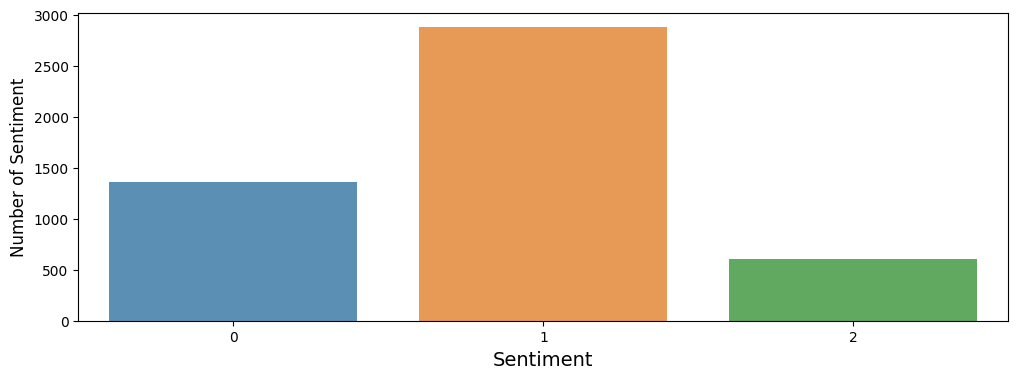

In [12]:
cnt_sen = df['sentiment'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x = cnt_sen.index, y = cnt_sen.values, alpha=0.8)
plt.ylabel('Number of Sentiment', fontsize=12)
plt.xlabel('Sentiment', fontsize=14)
plt.xticks()
plt.show();

**We done with sentiment column, let check a few random message in our data**

In [60]:
df.iloc[95][1]

/tmp/ipykernel_33/2836297900.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.iloc[95][1]


'finnish high technology provider vaahto group reports net sales of eur 41.8 mn in the accounting period september 2007 - february 2008 , an increase of 11.2 % from a year earlier .'

In [61]:
df.iloc[15][1]

/tmp/ipykernel_33/2572288777.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.iloc[15][1]


'foundries division reports its sales increased by 9.7 % to eur 63.1 mn from eur 57.5 mn in the corresponding period in 2006 , and sales of the machine shop division increased by 16.4 % to eur 41.2 mn from eur 35.4 mn in the corresponding period in 2006 .'

In [62]:
df.iloc[75][1]

/tmp/ipykernel_33/1370532145.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.iloc[75][1]


'other measures included increasing synergies and economies of scale within the grimaldi group and personnel adjustments , divestments and redelivery of excess tonnage .'

**Preprocessing our text using NLTK and Beautiful Soup**

In [63]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [64]:
def clean_text(text):
    # Remove HTML tags
    soup = BeautifulSoup(text, "html.parser")
    clean_text = soup.get_text()
    text = text.lower()
   # Tokenize text
    tokens = nltk.word_tokenize(clean_text)

    # Remove stopwords
    stopwords = nltk.corpus.stopwords.words('english')
    filtered_tokens = [word for word in tokens if word not in stopwords]

    # Stemming (optional)
    stemmer = nltk.PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

    # Join the tokens back into a single string
    cleaned_text = ' '.join(tokens)
    
    return text




In [65]:
df["Message"] =  df["Message"].apply(clean_text)

/tmp/ipykernel_33/1704895675.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


# Tokenization

In [18]:

def tokenize_text(text):
    return [word for sent in nltk.sent_tokenize(text) for word in word_tokenize(sent)]

# Train-test split
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize and tag each message
train_tagged = train.apply(lambda r: TaggedDocument(words=tokenize_text(r['Message']), tags=[r.sentiment]), axis=1)
test_tagged = test.apply(lambda r: TaggedDocument(words=tokenize_text(r['Message']), tags=[r.sentiment]), axis=1)

# Doc2Vec model training
vec_size = 20
d2v_model = Doc2Vec(dm=1, dm_mean=1, vector_size=vec_size, window=8, min_count=1, workers=1, alpha=0.065, min_alpha=0.065)
d2v_model.build_vocab([x for x in tqdm(train_tagged.values)])

for epoch in range(30):
    d2v_model.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    d2v_model.alpha -= 0.002
    d2v_model.min_alpha = d2v_model.alpha


# The maximum number of words to be used. (most frequent)
max_fatures = 500000

# Create embedding matrix
tokenizer = Tokenizer(num_words=max_fatures, split=' ', filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Message'].values)
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, vec_size))
for word, i in tokenizer.word_index.items():
    if word in d2v_model.wv:
        embedding_matrix[i] = d2v_model.wv[word]


100%|██████████| 3876/3876 [00:00<00:00, 1306212.62it/s]


In [19]:
train_tagged.values

array([TaggedDocument(words=['eqt', 'has', 'completed', 'its', 'exit', 'from', 'salcomp', ',', 'a', 'finnish', 'company', 'that', 'makes', 'mobile', 'phone', 'chargers', ',', 'by', 'selling', 'its', 'remaining', 'stake', 'to', 'swedish', 'investment', 'group', 'nordstjernan', 'for', 'about', '(', 'euro', ')', '35', 'million', '(', '$', '47', 'million', ')', '.'], tags=[1]),
       TaggedDocument(words=['in', 'september', '2010', ',', 'the', 'finnish', 'group', 'agreed', 'to', 'buy', 'danish', 'company', 'rose', 'poultry', 'a-s', 'for', 'up', 'to', 'eur23', '.9', 'm', 'in', 'a', 'combination', 'of', 'cash', 'and', 'stock', '.'], tags=[0]),
       TaggedDocument(words=['the', 'current', 'reference', 'grade', 'instruments', 'are', 'challenging', 'to', 'operate', 'due', 'to', 'their', 'high', 'price', 'and', 'complexity', 'for', 'routine', 'use', '.'], tags=[2]),
       ...,
       TaggedDocument(words=['proha', 'plc', '(', 'euronext', ':7327', ')', 'announced', 'today', '(', '19', 'may', 

**Now we start build a doc2vec model to prepare for word embedding**

In [20]:
print(d2v_model)

Doc2Vec<dm/m,d20,n5,w8,s0.001>


In [21]:
%%time
for epoch in range(30):
    d2v_model.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    d2v_model.alpha -= 0.002
    d2v_model.min_alpha = d2v_model.alpha

100%|██████████| 3876/3876 [00:00<00:00, 905184.98it/s]


CPU times: user 11.2 s, sys: 85.2 ms, total: 11.3 s
Wall time: 11.3 s


In [22]:
vocab_size = len(d2v_model.wv.key_to_index)
vocab_size

10311

In [23]:
embedding_matrix = np.zeros((vocab_size + 1, vec_size))
for i in range(vocab_size + 1):
    if i in d2v_model.dv:
        embedding_matrix[i] = d2v_model.dv[i]

**Now we have word embedding, let's check a few words that similar together**

In [24]:
d2v_model.wv.most_similar(positive=['invest'], topn=20)

[('construct', 0.8081568479537964),
 ('build', 0.732869029045105),
 ('realprojekti', 0.7315855026245117),
 ('gogol', 0.728490948677063),
 ('56', 0.7255181074142456),
 ('ahms', 0.7191019654273987),
 ('plot', 0.7068848609924316),
 ('karara', 0.7053298354148865),
 ('apple-pear', 0.6982035636901855),
 ('crore', 0.6924949288368225),
 ('parking', 0.68524569272995),
 ('office', 0.683809220790863),
 ('antenna', 0.6832533478736877),
 ('pre-contract', 0.6823768019676208),
 ('metres', 0.672901451587677),
 ('iraq', 0.6680005192756653),
 ('euro', 0.664215087890625),
 ('weight', 0.6633400321006775),
 ('implies', 0.6624925136566162),
 ('4w', 0.6619565486907959)]

In [25]:
d2v_model.wv.most_similar(positive=['loss'], topn=10)

[('profit', 0.9045387506484985),
 ('result', 0.7484834790229797),
 ('opinion', 0.7318944334983826),
 ('ten-year', 0.7189124226570129),
 ('recognize', 0.6984797120094299),
 ('commitments', 0.6974830627441406),
 ('trojan', 0.6874336004257202),
 ('-2.2', 0.6861532926559448),
 ('version', 0.685396671295166),
 ('activities', 0.6833518743515015)]

In [26]:
d2v_model.wv.most_similar(positive=['normal'], topn=10)

[('soft', 0.7589677572250366),
 ('current', 0.7503727078437805),
 ('tariff', 0.7409131526947021),
 ('extracted', 0.737907350063324),
 ('very', 0.7329918146133423),
 ('winter', 0.7297437191009521),
 ('explained', 0.7282193899154663),
 ('technical', 0.7223995327949524),
 ('trojans', 0.7201943397521973),
 ('attackers', 0.7187652587890625)]

**Define a function to visualize word embeddings in a 2-dimensional space using TSNE ( non-linear dimensionality reduction technique**

In [66]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

def tsne_plot(model):
    labels = []
    tokens = []

    for word in model.wv.key_to_index:
        tokens.append(model[word])
        labels.append(word)
    tokens_array = np.array(tokens)
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=250, random_state=23)
    new_values = tsne_model.fit_transform(tokens_array)

    x = new_values[:,0]
    y = new_values[:,1]
    
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

**This is our word embedding look like in 2D space**

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 136 (\x88) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 139 (\x8b) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 151 (\x97) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


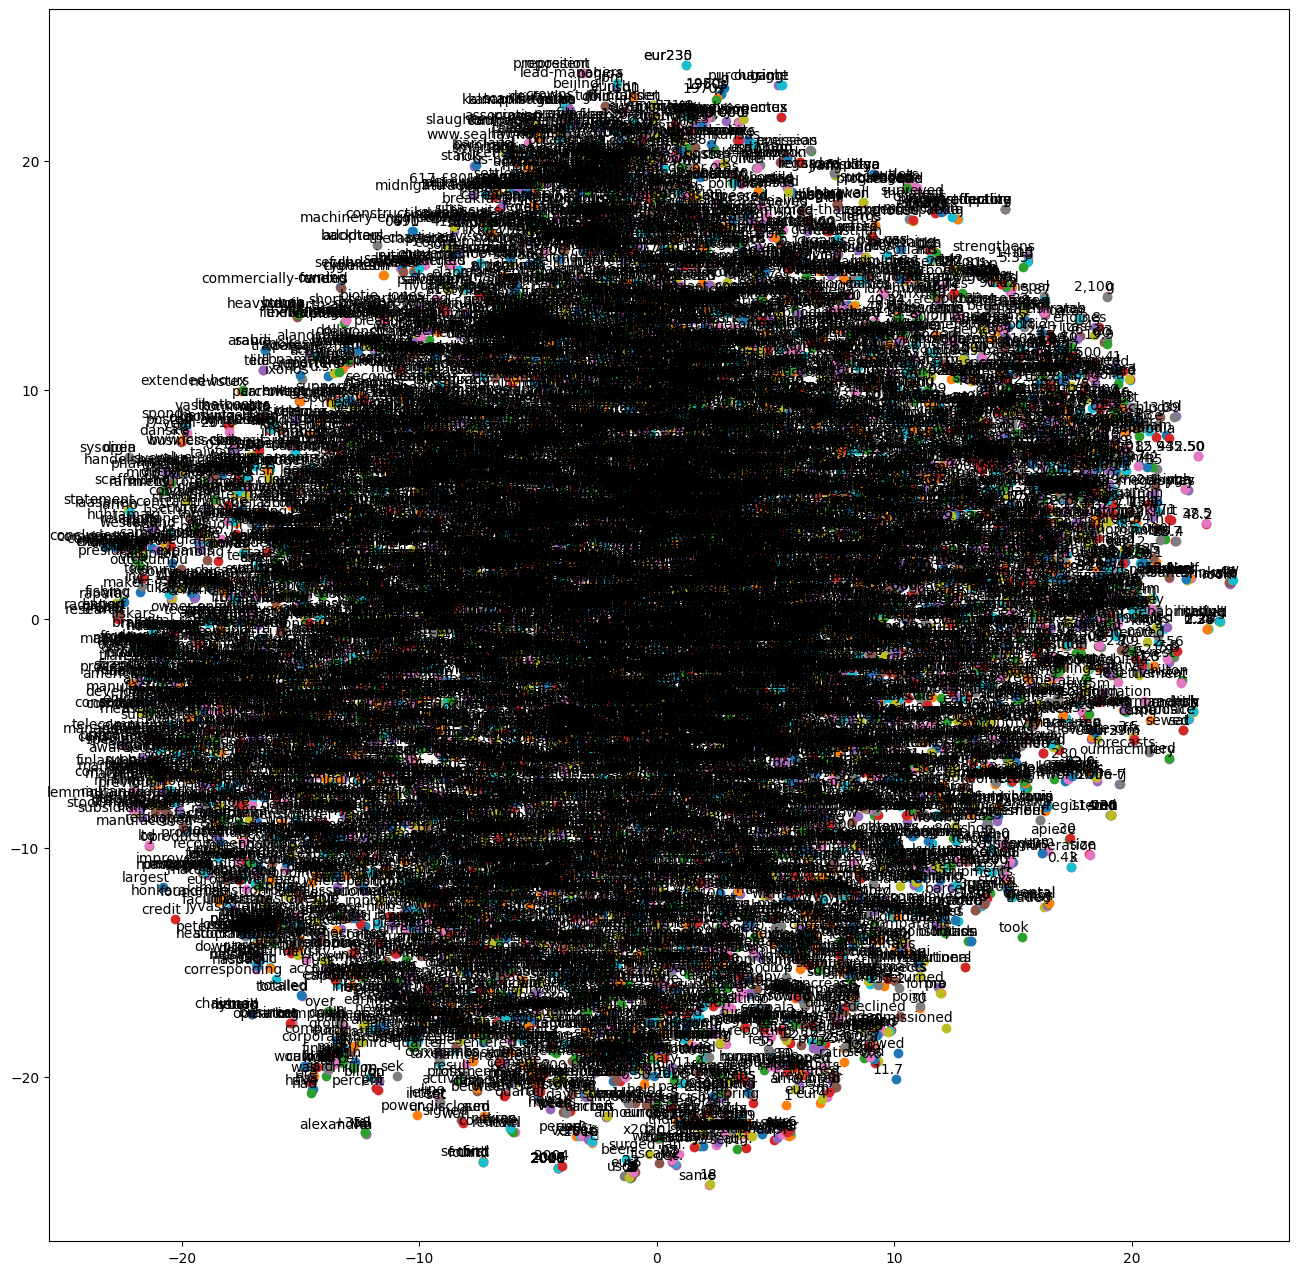

In [67]:
tsne_plot(d2v_model)

In [69]:
#the total number of unique words present in the dataset
vocab_size = len(d2v_model.wv.key_to_index)
vocab_size

10311

In [76]:
# check the first 20 words with tag in our vocab
first_20_words_dict = {word: index for word, index in d2v_model.wv.key_to_index.items() if index < 20}
print(first_20_words_dict)

{'the': 0, '.': 1, ',': 2, 'of': 3, 'in': 4, 'and': 5, 'to': 6, 'a': 7, 'for': 8, 'eur': 9, "'s": 10, 'is': 11, 'company': 12, 'will': 13, 'from': 14, 'on': 15, 'its': 16, 'by': 17, 'with': 18, 'be': 19}


**Create the LSTM Model**

In [31]:
vec_size = d2v_model.vector_size
vec_size

20

In [33]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from keras.layers import Dropout
# Max number of words.
MAX_SEQUENCE_LENGTH = 50
# init layer
model = Sequential()

# embeding word vectors
vocab_size = len(d2v_model.wv.key_to_index)
vec_size = d2v_model.vector_size
embedding_matrix = np.zeros((vocab_size, vec_size))
model.add(Embedding(input_dim=vocab_size, output_dim=vec_size, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=True))
model.add(Dropout(0.2))  # Add dropout with a rate of 0.2
model.add(LSTM(50,return_sequences=False))
model.add(Dense(3,activation="softmax"))

# output model architecture
model.summary()
model.compile(optimizer="adam",loss= 'categorical_crossentropy',metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 20)            206220    
                                                                 
 dropout (Dropout)           (None, 50, 20)            0         
                                                                 
 lstm (LSTM)                 (None, 50)                14200     
                                                                 
 dense (Dense)               (None, 3)                 153       
                                                                 
Total params: 220573 (861.61 KB)
Trainable params: 220573 (861.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Virtualization a model to understand our model architecture**

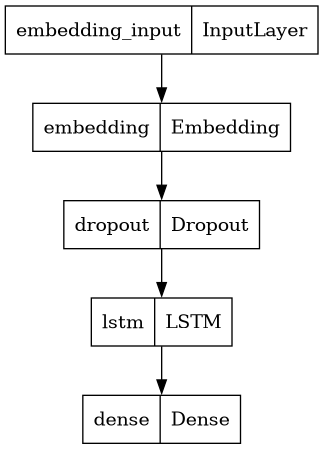

In [34]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [36]:
X = tokenizer.texts_to_sequences(df['Message'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
Y = pd.get_dummies(df['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(4118, 50) (4118, 3)
(727, 50) (727, 3)


In [78]:
X_test.shape

(727, 50)

In [37]:
batch_size = 32
history=model.fit(X_train, Y_train, epochs =25, batch_size=batch_size, verbose = 2)

Epoch 1/25
129/129 - 6s - loss: 0.8820 - acc: 0.6134 - 6s/epoch - 48ms/step
Epoch 2/25
129/129 - 4s - loss: 0.6395 - acc: 0.7127 - 4s/epoch - 28ms/step
Epoch 3/25
129/129 - 3s - loss: 0.4552 - acc: 0.7994 - 3s/epoch - 26ms/step
Epoch 4/25
129/129 - 3s - loss: 0.3021 - acc: 0.8817 - 3s/epoch - 26ms/step
Epoch 5/25
129/129 - 3s - loss: 0.1779 - acc: 0.9412 - 3s/epoch - 26ms/step
Epoch 6/25
129/129 - 3s - loss: 0.1102 - acc: 0.9626 - 3s/epoch - 26ms/step
Epoch 7/25
129/129 - 3s - loss: 0.0814 - acc: 0.9772 - 3s/epoch - 26ms/step
Epoch 8/25
129/129 - 3s - loss: 0.0609 - acc: 0.9818 - 3s/epoch - 25ms/step
Epoch 9/25
129/129 - 3s - loss: 0.0544 - acc: 0.9825 - 3s/epoch - 25ms/step
Epoch 10/25
129/129 - 3s - loss: 0.0400 - acc: 0.9883 - 3s/epoch - 26ms/step
Epoch 11/25
129/129 - 3s - loss: 0.0524 - acc: 0.9847 - 3s/epoch - 26ms/step
Epoch 12/25
129/129 - 3s - loss: 0.0337 - acc: 0.9903 - 3s/epoch - 27ms/step
Epoch 13/25
129/129 - 3s - loss: 0.0315 - acc: 0.9905 - 3s/epoch - 26ms/step
Epoch 14

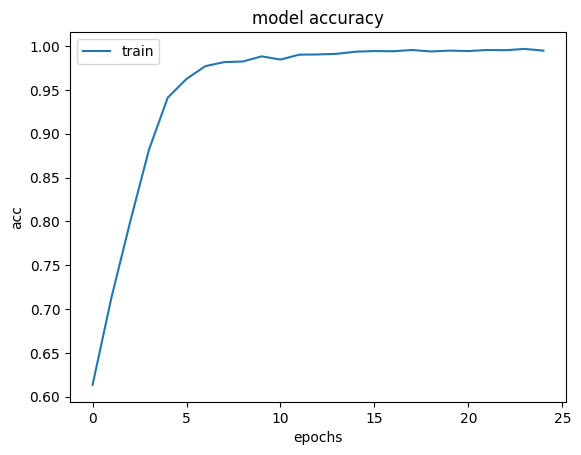

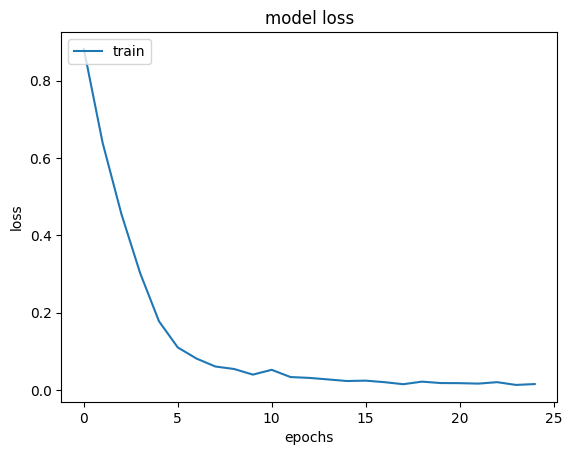

<Figure size 640x480 with 0 Axes>

In [38]:
# Virtualization our model training accuracy and loss
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_accuracy.png')

# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_loss.png')

In [39]:
accuracy = model.evaluate(X_test, Y_test)[1]
print("Accuracy:", accuracy)

23/23 [==============================] - 1s 10ms/step - loss: 1.8594 - acc: 0.6946
Accuracy: 0.6946355104446411


In [40]:
model.save('Mymodel.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [42]:
y_pred = model.predict(X_test)  # Replace with your prediction data

23/23 [==============================] - 1s 10ms/step


In [43]:
Y_test

array([[False,  True, False],
       [ True, False, False],
       [False,  True, False],
       ...,
       [False,  True, False],
       [ True, False, False],
       [ True, False, False]])

In [44]:
if Y_test.shape[1] > 1:  # Check if one-hot encoding is used
    y_true = np.argmax(Y_test, axis=1)
    y_pred = np.argmax(y_pred, axis=1)

In [45]:
len(y_pred)

727

In [46]:
cm = confusion_matrix(y_true, y_pred)

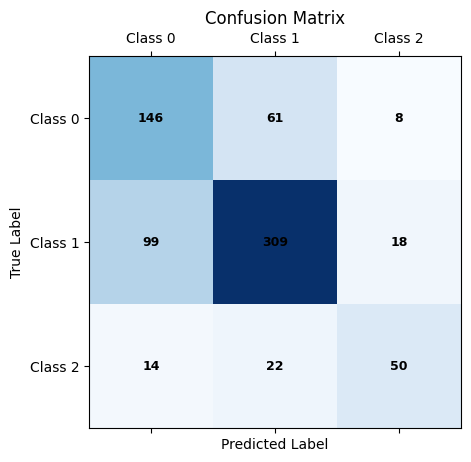

In [47]:
plt.matshow(cm, cmap=plt.cm.Blues)  # Choose a colormap (optional)

# Add labels for each cell (numbers representing counts)
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, "{:d}".format(z), ha='center', va='center', fontsize=9, fontweight='bold')

plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(range(len(cm[0])), ['Class {}'.format(i) for i in range(len(cm[0]))])
plt.yticks(range(len(cm)), ['Class {}'.format(i) for i in range(len(cm))])
plt.show()

# Let's test our model with a few new sentences

In [55]:
message = ["I win the lottery"]
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
sentiment = { 0:'positive',1: 'neutral', 2:'negative'}
print("\033[1m " + sentiment[int(labels[np.argmax(pred)])])

1/1 [==============================] - 0s 26ms/step
 positive


In [56]:
message = ["I was lay-off"]
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
sentiment = { 0:'positive',1: 'neutral', 2:'negative'}
print("\033[1m " + sentiment[int(labels[np.argmax(pred)])])

1/1 [==============================] - 0s 27ms/step
 negative


In [59]:
message = ["Ice Cream"]
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
sentiment = { 0:'positive',1: 'neutral', 2:'negative'}
print("\033[1m " + sentiment[int(labels[np.argmax(pred)])])

1/1 [==============================] - 0s 25ms/step
 neutral


**References**

1. Artificial Inteligence, Machine Learning and Deep Learning by Mercury Learning and Informarion (Book)
2. Source Information of NLP :https://monkeylearn.com/what-is-text-classification/
3. Parameter doc2vec and LSTM inspired by : https://dl.acm.org/doi/10.1145/3406601.3406624
4. (Bing Liu. Sentiment Analysis and Opinion Mining, Morgan & Claypool Publishers, May 2012.)
5. Long Short-Term Memory (LSTM): Concept, https://medium.com/@kangeugine/long-short-term-memory-lstm-concept-cb3283934359 
6. SITI KHOTIJAH, Kaggle competition 

**Thank you so much for your attention**